In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import fiona
import geojsonio as gjsio
import os
from pyrosm import OSM
import osmnx as ox
import networkx as nx
from geopy.geocoders import Nominatim

Use read_file function to read shapefile for GPS points/trajectory

In [2]:
# Script for countig the number of GPS points in a given GPS trajectory
route = "C:/University Grade4/4G06/gert_compiled_v4.3/map-matching_shared_v4.3/data/gps_trajectory/14640_20070403_17.shp"
traj_data = gpd.read_file(route)
gpsPoints = traj_data.shape[0]
print("The number of GPS points: %s" % str(gpsPoints))

The number of GPS points: 121


In [3]:
traj_data.head()

,EPISODEID,TRACKID,DURSEC,TIMESTART,ACTCODE,DESTCODE,geometry
0,14640_20070403_17,15325184,11,12:34:13,car,car,POINT (-63.47435 44.64705)
1,14640_20070403_17,15325185,2,12:34:15,car,car,POINT (-63.47437 44.64705)
2,14640_20070403_17,15325187,5,12:34:20,car,car,POINT (-63.47437 44.64703)
3,14640_20070403_17,15325188,3,12:34:23,car,car,POINT (-63.47433 44.64699)
4,14640_20070403_17,15325189,2,12:34:25,car,car,POINT (-63.47432 44.64698)


In [4]:
traj_data['geometry']

0      POINT (-63.47435 44.64705)
1      POINT (-63.47437 44.64705)
2      POINT (-63.47437 44.64703)
3      POINT (-63.47433 44.64699)
4      POINT (-63.47432 44.64698)
                  ...            
116    POINT (-63.47475 44.64708)
117    POINT (-63.47464 44.64714)
118    POINT (-63.47446 44.64717)
119    POINT (-63.47445 44.64713)
120    POINT (-63.47425 44.64705)
Name: geometry, Length: 121, dtype: geometry

Use geom_type attribute to check the geometry type (POINT, LINESTRING, MULTILINESTRING or etc.) of the geometry value

In [5]:
print(traj_data['geometry'][0])
traj_data['geometry'][0].geom_type

POINT (-63.47434997 44.64704513)


'Point'

<AxesSubplot:>

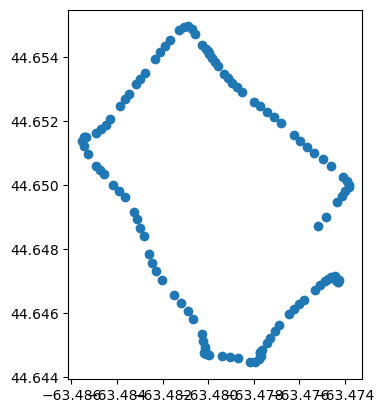

In [6]:
traj_data.plot()

In [7]:
traj_data.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

We can use fiona to open geodatabase (.gdb) file

Or open geodatabase directly with geopandas to create a geodataframe

In [8]:
gdb_df = gpd.read_file("C:/University Grade4/4G06/gert_compiled_v4.3/temp_workspace/data/network_dataset/CAN_GD.gdb")
len(gdb_df)

189

In [9]:
gdb_df.head()

,FULL_NAME,L_F_ADD,L_T_ADD,R_F_ADD,R_T_ADD,PREFIX,PRE_TYPE,NAME,TYPE,SUFFIX,...,FJUNCTION,TJUNCTION,ALIAS_NAME,FORMERNAME,HWY_NAME,HWY_NUM,TRANSCDAHWY,YELOWHDHWY,Shape_Length,geometry
0,MORRIS LAKE DR,0.0,0.0,0.0,0.0,,,MORRIS LAKE,DR,,...,2026002.0,2025998.0,None,None,None,None,NaN,NaN,0.000047,"MULTILINESTRING ((-63.48889 44.65367, -63.4889..."
1,NOVA TERR,84.0,94.0,91.0,93.0,,,NOVA,TERR,,...,2026151.0,2026205.0,None,None,None,None,NaN,NaN,0.000824,"MULTILINESTRING ((-63.48590 44.65932, -63.4851..."
2,GRENADIER DR,70.0,88.0,0.0,0.0,,,GRENADIER,DR,,...,2026390.0,2026319.0,None,None,None,None,NaN,NaN,0.001486,"MULTILINESTRING ((-63.48154 44.65803, -63.4829..."
3,MILLBROOK AVE,0.0,0.0,0.0,0.0,,,MILLBROOK,AVE,,...,2026354.0,2026375.0,None,None,None,None,NaN,NaN,0.000459,"MULTILINESTRING ((-63.48236 44.65135, -63.4822..."
4,ROWAN CRT,0.0,0.0,0.0,0.0,,,ROWAN,CRT,,...,2026198.0,2026198.0,None,None,None,None,NaN,NaN,0.000654,"MULTILINESTRING ((-63.48522 44.65248, -63.4852..."


In [10]:
gdb_df.dtypes

FULL_NAME         object
L_F_ADD          float64
L_T_ADD          float64
R_F_ADD          float64
R_T_ADD          float64
PREFIX            object
PRE_TYPE          object
NAME              object
TYPE              object
SUFFIX            object
CARTO            float64
CITYL             object
LEFT_MAF          object
ZIPL              object
STATE_ABBR        object
ONEWAY            object
ON_RAMP            int64
OFF_RAMP           int64
EXIT_NUM          object
EXIT_DIR          object
FERRY_TYPE        object
ROAD_DIR          object
FNODE            float64
TNODE            float64
SPD_MI           float64
RDLEN_MI         float64
SPD_KM           float64
RDLEN_M          float64
FT_MINUTES       float64
TF_MINUTES       float64
F_ZLEV             int64
T_ZLEV             int64
SHAPEID          float64
USERID           float64
CFCC              object
DISP_CODE        float64
RECORD_          float64
FJUNCTION        float64
TJUNCTION        float64
ALIAS_NAME        object


In [11]:
gdb_df[gdb_df['FULL_NAME'] == 'CALDWELL RD']

,FULL_NAME,L_F_ADD,L_T_ADD,R_F_ADD,R_T_ADD,PREFIX,PRE_TYPE,NAME,TYPE,SUFFIX,...,FJUNCTION,TJUNCTION,ALIAS_NAME,FORMERNAME,HWY_NAME,HWY_NUM,TRANSCDAHWY,YELOWHDHWY,Shape_Length,geometry
9,CALDWELL RD,380.0,396.0,385.0,413.0,,,CALDWELL,RD,,...,2025937.0,2025977.0,None,None,None,None,NaN,NaN,0.001521,"MULTILINESTRING ((-63.49030 44.65775, -63.4893..."
11,CALDWELL RD,556.0,566.0,507.0,515.0,,,CALDWELL,RD,,...,2026179.0,2026249.0,None,None,None,None,NaN,NaN,0.001714,"MULTILINESTRING ((-63.48551 44.65139, -63.4852..."
18,CALDWELL RD,300.0,346.0,299.0,349.0,,,CALDWELL,RD,,...,2025804.0,2025900.0,None,None,None,None,NaN,NaN,0.001569,"MULTILINESTRING ((-63.49207 44.65982, -63.4917..."
42,CALDWELL RD,898.0,922.0,915.0,915.0,,,CALDWELL,RD,,...,2026440.0,2026098.0,None,None,None,None,NaN,NaN,0.010922,"MULTILINESTRING ((-63.48018 44.64466, -63.4813..."
52,CALDWELL RD,0.0,0.0,0.0,0.0,,,CALDWELL,RD,,...,2025933.0,2025937.0,None,None,None,None,NaN,NaN,0.000050,"MULTILINESTRING ((-63.49033 44.65778, -63.4903..."
71,CALDWELL RD,662.0,662.0,0.0,0.0,,,CALDWELL,RD,,...,2026343.0,2026355.0,None,None,None,None,NaN,NaN,0.000606,"MULTILINESTRING ((-63.48262 44.64792, -63.4825..."
77,CALDWELL RD,486.0,542.0,471.0,505.0,,,CALDWELL,RD,,...,2026069.0,2026179.0,None,None,None,None,NaN,NaN,0.003351,"MULTILINESTRING ((-63.48755 44.65404, -63.4874..."
90,CALDWELL RD,0.0,0.0,0.0,0.0,,,CALDWELL,RD,,...,2026098.0,2026252.0,None,None,None,None,NaN,NaN,0.004071,"MULTILINESTRING ((-63.48705 44.63708, -63.4870..."
108,CALDWELL RD,610.0,614.0,0.0,0.0,,,CALDWELL,RD,,...,2026249.0,2026315.0,None,None,None,None,NaN,NaN,0.001957,"MULTILINESTRING ((-63.48430 44.65018, -63.4839..."
125,CALDWELL RD,414.0,470.0,417.0,465.0,,,CALDWELL,RD,,...,2025977.0,2026069.0,None,None,None,None,NaN,NaN,0.003093,"MULTILINESTRING ((-63.48936 44.65655, -63.4886..."


In [12]:
str(gdb_df['geometry'].iloc[0])

'MULTILINESTRING ((-63.4888949999999 44.65367200000009, -63.48894199999995 44.65367200000009))'

In [13]:
len(gdb_df[gdb_df.geom_type == 'MultiLineString'])

189

<AxesSubplot:>

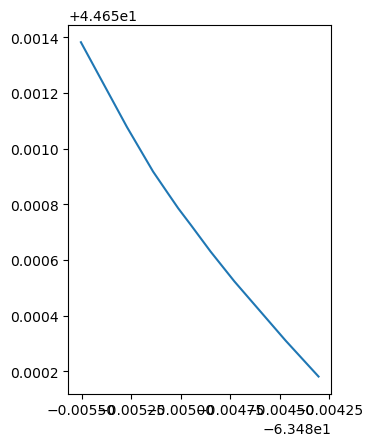

In [14]:
gdb_df[gdb_df['FULL_NAME'] == 'CALDWELL RD'].iloc[1:2].plot()

We can assign a Coordinate Reference System (CRS) with EPSG number to adjust the scale of the plot for the trajectory data

{'init': 'epsg:26920', 'no_defs': True}


<AxesSubplot:>

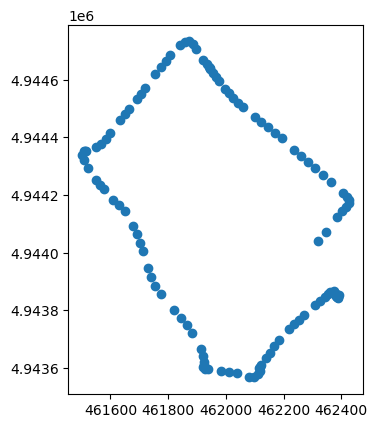

In [15]:
# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg

print(from_epsg(26920))
#traj_data.crs = from_epsg(26920)
traj_data_crs = traj_data.to_crs('EPSG:26920')

traj_data_crs.plot()

In [16]:
traj_data_crs.crs

<Projected CRS: EPSG:26920>
Name: NAD83 / UTM zone 20N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - 66°W to 60°W and NAD83 by country
- bounds: (-66.0, 15.63, -60.0, 84.0)
Coordinate Operation:
- name: UTM zone 20N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Using to_file method to output the geodataframe as a shapefile (.shp) or other types of file if needed

In [17]:
traj_data_crs.to_file("./traj_with_crs.shp")

In [18]:
traj_data_crs = gpd.read_file("./traj_with_crs.shp")

In [19]:
traj_data_crs.head()

,EPISODEID,TRACKID,DURSEC,TIMESTART,ACTCODE,DESTCODE,geometry
0,14640_20070403_17,15325184,11,12:34:13,car,car,POINT (462385.143 4943852.226)
1,14640_20070403_17,15325185,2,12:34:15,car,car,POINT (462383.933 4943852.233)
2,14640_20070403_17,15325187,5,12:34:20,car,car,POINT (462383.923 4943850.538)
3,14640_20070403_17,15325188,3,12:34:23,car,car,POINT (462386.924 4943846.283)
4,14640_20070403_17,15325189,2,12:34:25,car,car,POINT (462387.524 4943845.433)


<AxesSubplot:>

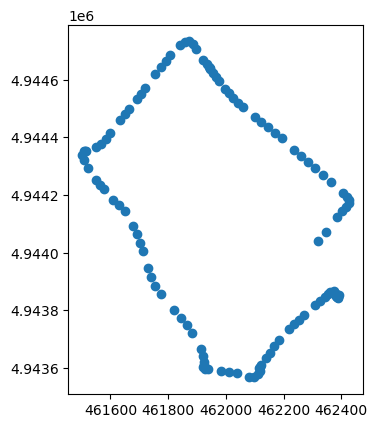

In [20]:
traj_data_crs.plot()

In [21]:
shifted_df = traj_data_crs.shift()

In [22]:
shifted_df.head()

,EPISODEID,TRACKID,DURSEC,TIMESTART,ACTCODE,DESTCODE,geometry
0,NaN,NaN,NaN,NaN,NaN,NaN,None
1,14640_20070403_17,15325184,11,12:34:13,car,car,POINT (462385.143 4943852.226)
2,14640_20070403_17,15325185,2,12:34:15,car,car,POINT (462383.933 4943852.233)
3,14640_20070403_17,15325187,5,12:34:20,car,car,POINT (462383.923 4943850.538)
4,14640_20070403_17,15325188,3,12:34:23,car,car,POINT (462386.924 4943846.283)


In [23]:
traj_data_crs.distance(shifted_df).iloc[1:20]

1       1.210104
2       1.695117
3       5.206831
4       1.040462
5       1.408475
6       3.216331
7       2.995827
8       3.101770
9       4.880193
10      1.209310
11      1.721831
12    192.376713
13     42.538998
14     65.079781
15     25.898888
16     20.179560
17     19.528664
18      8.072846
19     13.194765
dtype: float64

In [24]:
traj_len = traj_data_crs.distance(shifted_df)[1:].sum()
print("Original length of the GPS trajectory is: " + str(round(traj_len,2)) + "m")

Original length of the GPS trajectory is: 3227.62m


Transfer the geopandas dataframe to geojson format then to json string and use geojsonio package to display the GPS points

In [25]:
traj_data_crs.to_file('traj_with_crs.geojson', driver='GeoJSON')

In [26]:
#print(gdb_df.to_json())

In [27]:
print(gjsio.make_url(gdb_df.head().to_json()))

http://geojson.io/#data=data:application/json,%7B%22type%22%3A%20%22FeatureCollection%22%2C%20%22features%22%3A%20%5B%7B%22id%22%3A%20%220%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22ALIAS_NAME%22%3A%20null%2C%20%22CARTO%22%3A%205.0%2C%20%22CFCC%22%3A%20%22A40%22%2C%20%22CITYL%22%3A%20%22HALIFAX%22%2C%20%22DISP_CODE%22%3A%2040.0%2C%20%22EXIT_DIR%22%3A%20%22%20%22%2C%20%22EXIT_NUM%22%3A%20%22%20%22%2C%20%22FERRY_TYPE%22%3A%20%22%20%22%2C%20%22FJUNCTION%22%3A%202026002.0%2C%20%22FNODE%22%3A%201542668.0%2C%20%22FORMERNAME%22%3A%20null%2C%20%22FT_MINUTES%22%3A%200.004%2C%20%22FULL_NAME%22%3A%20%22MORRIS%20LAKE%20DR%22%2C%20%22F_ZLEV%22%3A%200%2C%20%22HWY_NAME%22%3A%20null%2C%20%22HWY_NUM%22%3A%20null%2C%20%22LEFT_MAF%22%3A%20%22HALIFAX%22%2C%20%22L_F_ADD%22%3A%200.0%2C%20%22L_T_ADD%22%3A%200.0%2C%20%22NAME%22%3A%20%22MORRIS%20LAKE%22%2C%20%22OFF_RAMP%22%3A%200%2C%20%22ONEWAY%22%3A%20%22%20%22%2C%20%22ON_RAMP%22%3A%200%2C%20%22PREFIX%22%3A%20%22%20%22%2C%20%22PRE_

In [28]:
traj_gjs = gpd.read_file('traj_with_crs.geojson')
traj_gjs = traj_data.to_json()
#print((traj_gjs))

Can also use gjsio.display(traj_gjs) to display, but the url would be too long for Windows to handle

In [29]:
#gjsio.display(traj_gjs)
# Click the printed url to display the GPS points
print(gjsio.make_url(traj_gjs))

http://geojson.io/#data=data:application/json,%7B%22type%22%3A%20%22FeatureCollection%22%2C%20%22features%22%3A%20%5B%7B%22id%22%3A%20%220%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22ACTCODE%22%3A%20%22car%22%2C%20%22DESTCODE%22%3A%20%22car%22%2C%20%22DURSEC%22%3A%20%2211%22%2C%20%22EPISODEID%22%3A%20%2214640_20070403_17%22%2C%20%22TIMESTART%22%3A%20%2212%3A34%3A13%22%2C%20%22TRACKID%22%3A%20%2215325184%22%7D%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Point%22%2C%20%22coordinates%22%3A%20%5B-63.47434997%2C%2044.64704513%5D%7D%7D%2C%20%7B%22id%22%3A%20%221%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22ACTCODE%22%3A%20%22car%22%2C%20%22DESTCODE%22%3A%20%22car%22%2C%20%22DURSEC%22%3A%20%222%22%2C%20%22EPISODEID%22%3A%20%2214640_20070403_17%22%2C%20%22TIMESTART%22%3A%20%2212%3A34%3A15%22%2C%20%22TRACKID%22%3A%20%2215325185%22%7D%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Point%22%2C%20%22coordinates%22%3A%20%5B-63.47436523%2C%2044

In [30]:
output_route = "C:/University Grade4/4G06/gert_compiled_v4.3/map-matching_shared_v4.3/data/output/14640_20070403_17.shp"
output_traj_data = gpd.read_file(output_route)

In [31]:
output_traj_data

,route_name,distance_m,time_min,crowdist_m,traclen_m,num_roads,l_turns,r_turns,sl_turns,sr_turns,t_turns,rdi,crossings,distxing,longleg_nm,longleg_dm,geometry
0,14640_20070403_17,3279.713635,3.934355,25.634772,3304.481224,7,1,5,1,0,7,127.94,21,156.17684,CALDWELL RD,875.671,"LINESTRING (-63.47447 44.64722, -63.47650 44.6..."


In [32]:
output_traj_data.to_file('output_traj.geojson', driver='GeoJSON')
output_traj_gjs = gpd.read_file('output_traj.geojson')
#output_traj_gjs = output_traj_data.to_json()
output_traj_gjs = output_traj_gjs.to_json()
#print(output_traj_gjs)

In [33]:
#gjsio.display(output_traj_gjs)

Prototype code of converting CSV file to Shapefile

In [34]:
# Read CSV file with Pandas to generate dataframe
csv_path = 'C:/University Grade4/4G06/PyERT-BLACK/quarto-example/data/sample-gps/sample-gps-1.csv'
gps_df = pd.read_csv(csv_path)
gps_df.head()

,RecordID,SerialID,LocalTime,latitude,longitude,Fix_Status,DOP,Speed_kmh,Limit_kmh
0,5685,26,9/3/2009 11:57,43.337420,-79.790290,3D Fix,0.5,0.0,50
1,5686,26,9/3/2009 11:57,43.337422,-79.790290,3D Fix,0.5,0.0,50
2,5687,26,9/3/2009 11:57,43.337420,-79.790288,3D Fix,0.5,0.0,50
3,5688,26,9/3/2009 11:57,43.337418,-79.790283,3D Fix,0.5,2.2,50
4,5689,26,9/3/2009 11:57,43.337410,-79.790272,3D Fix,0.5,5.9,50


In [35]:
# Transfer dataframe to geodataframe for geopandas
gps_gdf = gpd.GeoDataFrame(gps_df, geometry = gpd.points_from_xy(gps_df['longitude'], gps_df['latitude']))
print(len(gps_gdf))
gps_gdf.head()

9520


,RecordID,SerialID,LocalTime,latitude,longitude,Fix_Status,DOP,Speed_kmh,Limit_kmh,geometry
0,5685,26,9/3/2009 11:57,43.337420,-79.790290,3D Fix,0.5,0.0,50,POINT (-79.79029 43.33742)
1,5686,26,9/3/2009 11:57,43.337422,-79.790290,3D Fix,0.5,0.0,50,POINT (-79.79029 43.33742)
2,5687,26,9/3/2009 11:57,43.337420,-79.790288,3D Fix,0.5,0.0,50,POINT (-79.79029 43.33742)
3,5688,26,9/3/2009 11:57,43.337418,-79.790283,3D Fix,0.5,2.2,50,POINT (-79.79028 43.33742)
4,5689,26,9/3/2009 11:57,43.337410,-79.790272,3D Fix,0.5,5.9,50,POINT (-79.79027 43.33741)


In [36]:
gps_gdf['DOP'].value_counts()

0.5     8330
0.6      802
0.4      261
0.7       75
0.8       27
1.1        8
1.0        6
0.9        4
1.3        2
1.9        1
1.2        1
25.0       1
1.4        1
3.4        1
Name: DOP, dtype: int64

In [37]:
# Set CRS to geodataframe and generate shapefile
gps_gdf = gps_gdf.set_crs('epsg:4326')
gps_gdf.to_file(filename='sample_gps_1', driver = 'ESRI Shapefile')

In [38]:
gps_gdf.head()

,RecordID,SerialID,LocalTime,latitude,longitude,Fix_Status,DOP,Speed_kmh,Limit_kmh,geometry
0,5685,26,9/3/2009 11:57,43.337420,-79.790290,3D Fix,0.5,0.0,50,POINT (-79.79029 43.33742)
1,5686,26,9/3/2009 11:57,43.337422,-79.790290,3D Fix,0.5,0.0,50,POINT (-79.79029 43.33742)
2,5687,26,9/3/2009 11:57,43.337420,-79.790288,3D Fix,0.5,0.0,50,POINT (-79.79029 43.33742)
3,5688,26,9/3/2009 11:57,43.337418,-79.790283,3D Fix,0.5,2.2,50,POINT (-79.79028 43.33742)
4,5689,26,9/3/2009 11:57,43.337410,-79.790272,3D Fix,0.5,5.9,50,POINT (-79.79027 43.33741)


In [39]:
#gps_gjson = gps_gdf['geometry'].iloc[0:844].to_json()
#print(gjsio.make_url(gps_gjson))
#gps_gjson

In [40]:
gps_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
gps_gdf['LocalTime'].value_counts().sort_index()

9/3/2009 11:57    52
9/3/2009 11:58    60
9/3/2009 11:59    60
9/3/2009 12:00     9
9/3/2009 12:01    11
                  ..
9/3/2009 16:17    60
9/3/2009 16:18    60
9/3/2009 16:19    60
9/3/2009 16:20    60
9/3/2009 16:21    28
Name: LocalTime, Length: 168, dtype: int64

In [42]:
proj_gps_gdf = gps_gdf.to_crs('EPSG:26920')

In [43]:
shifted_df = proj_gps_gdf.shift()

In [44]:
proj_gps_gdf.distance(shifted_df)[1:]

1       0.227198
2       0.281283
3       0.472761
4       1.287563
5       2.619879
          ...   
9515    0.113598
9516    0.000000
9517    0.227196
9518    0.227196
9519    0.000000
Length: 9519, dtype: float64

In [45]:
traj_len = proj_gps_gdf.distance(shifted_df)[1:].sum()
print("Original length of the GPS trajectory is: " + str(round(traj_len,2)) + "m")

Original length of the GPS trajectory is: 107885.9m


In [46]:
gps_gdf.head()

,RecordID,SerialID,LocalTime,latitude,longitude,Fix_Status,DOP,Speed_kmh,Limit_kmh,geometry
0,5685,26,9/3/2009 11:57,43.337420,-79.790290,3D Fix,0.5,0.0,50,POINT (-79.79029 43.33742)
1,5686,26,9/3/2009 11:57,43.337422,-79.790290,3D Fix,0.5,0.0,50,POINT (-79.79029 43.33742)
2,5687,26,9/3/2009 11:57,43.337420,-79.790288,3D Fix,0.5,0.0,50,POINT (-79.79029 43.33742)
3,5688,26,9/3/2009 11:57,43.337418,-79.790283,3D Fix,0.5,2.2,50,POINT (-79.79028 43.33742)
4,5689,26,9/3/2009 11:57,43.337410,-79.790272,3D Fix,0.5,5.9,50,POINT (-79.79027 43.33741)


<AxesSubplot:>

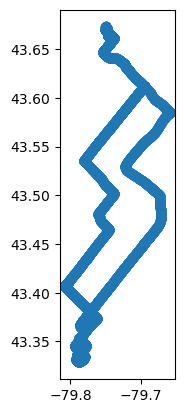

In [47]:
gps_gdf.plot()

In [48]:
from shapely.geometry import Point, LineString
from shapely.ops import nearest_points
from shapely.geometry import MultiPoint

In [49]:
line_string= LineString([(1,0),(3,0)])
point = Point(2,1)

Using distance method can calculate the distance between a Point and a Linestring

In [50]:
line_string.distance(point)

1.0

Using interpolate and project methods can find the closest Point from a Linestring to given Point

In [51]:
str(line_string.interpolate(line_string.project(point)))

'POINT (2 0)'

Use pyrosm to create GeoDataframes for driving network, walking network, buildings and landuse from OpenStreetMap PBF file

In [52]:
osm_path = "C:/University Grade4/4G06/PyERT-BLACK/quarto-example/data/sample-osm/planet_-80.265,43.283_-79.276,43.734.osm.pbf"
# Create Pyrosm object using the filepath of OSM PBF file as input
osm = OSM(osm_path)

In [53]:
buildings = osm.get_buildings()

In [54]:
buildings.head()

,addr:city,addr:country,addr:full,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,...,source,start_date,wikipedia,id,timestamp,version,tags,osm_type,geometry,changeset
0,None,None,None,None,None,None,None,None,None,Bob Abate Community recreation Centre,...,None,None,None,4300595,0,-1,None,way,"POLYGON ((-79.42036 43.66220, -79.42050 43.662...",NaN
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,4300640,0,-1,"{""access"":""yes"",""fee"":""no"",""note"":""seasonal"",""...",way,"POLYGON ((-79.42059 43.66475, -79.42073 43.664...",NaN
2,None,None,None,None,None,None,None,None,None,None,...,None,None,None,4300644,0,-1,"{""sport"":""clubhouse""}",way,"POLYGON ((-79.42239 43.66531, -79.42230 43.665...",NaN
3,Toronto,None,None,220,None,M5B 2H1,None,Yonge Street,tecguestservices@cadillacfairview.com,CF Toronto Eaton Centre,...,None,None,en:Toronto Eaton Centre,4321312,0,-1,"{""name:en"":""CF Toronto Eaton Centre"",""name:ko""...",way,"POLYGON ((-79.38079 43.65266, -79.38100 43.653...",NaN
4,Toronto,None,None,100,None,M5S 2C6,None,Queen's Park,None,Royal Ontario Museum,...,None,None,en:Royal Ontario Museum,4942687,0,-1,"{""fee"":""yes"",""layer"":""1"",""name:fr"":""Mus\u00E9e...",way,"POLYGON ((-79.39547 43.66798, -79.39532 43.668...",NaN


In [55]:
buildings.dtypes

addr:city               object
addr:country            object
addr:full               object
addr:housenumber        object
addr:housename          object
addr:postcode           object
addr:place              object
addr:street             object
email                   object
name                    object
opening_hours           object
operator                object
phone                   object
ref                     object
url                     object
website                 object
building                object
amenity                 object
building:flats          object
building:levels         object
building:material       object
building:min_level      object
building:use            object
craft                   object
height                  object
internet_access         object
landuse                 object
office                  object
shop                    object
source                  object
start_date              object
wikipedia               object
id      

Filter out the buildings with no address or name that is given

In [56]:
buildings[((-buildings['addr:housenumber'].isnull()) & (-buildings['addr:street'].isnull())) | (-buildings['name'].isnull())].head()

,addr:city,addr:country,addr:full,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,...,source,start_date,wikipedia,id,timestamp,version,tags,osm_type,geometry,changeset
0,None,None,None,None,None,None,None,None,None,Bob Abate Community recreation Centre,...,None,None,None,4300595,0,-1,None,way,"POLYGON ((-79.42036 43.66220, -79.42050 43.662...",NaN
3,Toronto,None,None,220,None,M5B 2H1,None,Yonge Street,tecguestservices@cadillacfairview.com,CF Toronto Eaton Centre,...,None,None,en:Toronto Eaton Centre,4321312,0,-1,"{""name:en"":""CF Toronto Eaton Centre"",""name:ko""...",way,"POLYGON ((-79.38079 43.65266, -79.38100 43.653...",NaN
4,Toronto,None,None,100,None,M5S 2C6,None,Queen's Park,None,Royal Ontario Museum,...,None,None,en:Royal Ontario Museum,4942687,0,-1,"{""fee"":""yes"",""layer"":""1"",""name:fr"":""Mus\u00E9e...",way,"POLYGON ((-79.39547 43.66798, -79.39532 43.668...",NaN
5,None,None,None,None,None,None,None,None,None,Terminal 1 Parking Garage,...,None,None,None,5191239,0,-1,"{""fee"":""yes"",""parking"":""multi-storey""}",way,"POLYGON ((-79.61034 43.68330, -79.61039 43.683...",NaN
6,Toronto,None,None,300,None,None,None,Queen Street West,None,None,...,None,None,None,5914896,0,-1,"{""building:colour"":""beige""}",way,"POLYGON ((-79.39382 43.64996, -79.39381 43.649...",NaN


Set the 'osm_type' and 'id' columns to be the Multi-index of the buildings geodataframe

In [57]:
buildings.set_index(['osm_type','id'], inplace=True)

In [58]:
buildings.head()

addr:city addr:country addr:full addr:housenumber  \
osm_type id                                                          
way      4300595      None         None      None             None   
         4300640      None         None      None             None   
         4300644      None         None      None             None   
         4321312   Toronto         None      None              220   
         4942687   Toronto         None      None              100   

                 addr:housename addr:postcode addr:place   addr:street  \
osm_type id                                                              
way      4300595           None          None       None          None   
         4300640           None          None       None          None   
         4300644           None          None       None          None   
         4321312           None       M5B 2H1       None  Yonge Street   
         4942687           None       M5S 2C6       None  Queen's Park   

                                                  email  \
osm_type id                                               
way      4300595                                   None   
         4300640                                   None   
         4300644                                   None   
         4321312  tecguestservices@cadillacfairview.com   
         4942687                                   None   

                                                   name  ... office  shop  \
osm_type id                                              ...                
way      4300595  Bob Abate Community recreation Centre  ...   None  None   
         4300640                                   None  ...   None  None   
         4300644                                   None  ...   None  None   
         4321312                CF Toronto Eaton Centre  ...   None  mall   
         4942687                   Royal Ontario Museum  ...   None  None   

                 source start_date                wikipedia timestamp version  \
osm_type id                                                                     
way      4300595   None       None                     None         0      -1   
         4300640   None       None                     None         0      -1   
         4300644   None       None                     None         0      -1   
         4321312   None       None  en:Toronto Eaton Centre         0      -1   
         4942687   None       None  en:Royal Ontario Museum         0      -1   

                                                               tags  \
osm_type id                                                           
way      4300595                                               None   
         4300640  {"access":"yes","fee":"no","note":"seasonal","...   
         4300644                              {"sport":"clubhouse"}   
         4321312  {"name:en":"CF Toronto Eaton Centre","name:ko"...   
         4942687  {"fee":"yes","layer":"1","name:fr":"Mus\u00E9e...   

                                                           geometry changeset  
osm_type id                                                                    
way      4300595  POLYGON ((-79.42036 43.66220, -79.42050 43.662...       NaN  
         4300640  POLYGON ((-79.42059 43.66475, -79.42073 43.664...       NaN  
         4300644  POLYGON ((-79.42239 43.66531, -79.42230 43.665...       NaN  
         4321312  POLYGON ((-79.38079 43.65266, -79.38100 43.653...       NaN  
         4942687  POLYGON ((-79.39547 43.66798, -79.39532 43.668...       NaN  

[5 rows x 37 columns]

In [59]:
# extracting landuse data in the OSM PBF file
landuse = osm.get_landuse()

Set the 'osm_type' and 'id' columns to be the Multi-index of the landuse geodataframe

In [60]:
landuse.set_index(['osm_type','id'], inplace=True)

In [61]:
landuse.head()

lat  \
osm_type id                     
node     276083736  43.341427   
         415943152  43.641766   
         558604994  43.630753   
         558605001  43.603706   
         558605004  43.549900   

                                                                 tags  \
osm_type id                                                             
node     276083736                         {"name":"AIC & Berkshire"}   
         415943152  {"addr:city":"Toronto","addr:housenumber":"355...   
         558604994  {"attribution":"Natural Resources Canada","can...   
         558605001  {"attribution":"Natural Resources Canada","can...   
         558605004  {"attribution":"Natural Resources Canada","can...   

                    version  changeset        lon  timestamp industrial  \
osm_type id                                                               
node     276083736        0        0.0 -79.833740          0       None   
         415943152        0        0.0 -79.396080          0       None   
         558604994        0        0.0 -79.924057          0       None   
         558605001        0        0.0 -79.889236          0       None   
         558605004        0        0.0 -79.911621          0       None   

                       landuse railway residential  \
osm_type id                                          
node     276083736  commercial    None        None   
         415943152     railway    yard        None   
         558604994    cemetery    None        None   
         558605001    cemetery    None        None   
         558605004    cemetery    None        None   

                                      geometry basin construction military  
osm_type id                                                                 
node     276083736  POINT (-79.83374 43.34143)   NaN          NaN      NaN  
         415943152  POINT (-79.39608 43.64177)   NaN          NaN      NaN  
         558604994  POINT (-79.92406 43.63075)   NaN          NaN      NaN  
         558605001  POINT (-79.88924 43.60371)   NaN          NaN      NaN  
         558605004  POINT (-79.91162 43.54990)   NaN          NaN      NaN

Driving and Walking networks can be extracted into nodes and edges

In [62]:
drive_nodes, drive_edges = osm.get_network(nodes=True, network_type='driving')
#walk_nodes, walk_edges = osm.get_network(nodes=True, network_type='walking')

Pyrosm object can be converted into a networkx graph

In [63]:
graph = osm.to_graph(drive_nodes, drive_edges, graph_type='networkx', retain_all=True)

GeoDataframe of Nodes and Edges that are extracted from OSM PBF file can be converted into an OSMnx graph, but some columns need to be renamed or set to index of the dataframe

In [64]:
# Original columns of Nodes
drive_nodes.head()

,lon,lat,tags,timestamp,version,changeset,id,geometry
0,-79.405077,43.697334,None,0,0,0,1360124654,POINT (-79.40508 43.69733)
1,-79.405259,43.697420,None,0,0,0,1360124656,POINT (-79.40526 43.69742)
2,-79.405408,43.697468,"{'direction': 'forward', 'highway': 'stop'}",0,0,0,7620170939,POINT (-79.40541 43.69747)
3,-79.405447,43.697481,None,0,0,0,1360124657,POINT (-79.40545 43.69748)
4,-79.405495,43.697504,None,0,0,0,7620170936,POINT (-79.40550 43.69750)


In [65]:
# Columns for id, longitude and latitude need to be remaned to osmid, x and y respectively
drive_nodes['osmid'] = drive_nodes['id']
drive_nodes['x'] = drive_nodes['lon']
drive_nodes['y'] = drive_nodes['lat']
# Dropping the original columns for id, longitude and latitude
drive_nodes.drop(columns=['id', 'lon', 'lat'], inplace = True)
# set column osmid to index
drive_nodes.set_index('osmid', inplace=True)

In [66]:
# Renamed columns of Nodes
drive_nodes.head()

,tags,timestamp,version,changeset,geometry,x,y
osmid,,,,,,,
1360124654,None,0,0,0,POINT (-79.40508 43.69733),-79.405077,43.697334
1360124656,None,0,0,0,POINT (-79.40526 43.69742),-79.405259,43.697420
7620170939,"{'direction': 'forward', 'highway': 'stop'}",0,0,0,POINT (-79.40541 43.69747),-79.405408,43.697468
1360124657,None,0,0,0,POINT (-79.40545 43.69748),-79.405447,43.697481
7620170936,None,0,0,0,POINT (-79.40550 43.69750),-79.405495,43.697504


In [67]:
# Original columns of Edges
drive_edges.dtypes

access             object
area               object
bicycle            object
bridge             object
cycleway           object
foot               object
footway            object
highway            object
junction           object
lanes              object
lit                object
maxspeed           object
motorcar           object
motorroad          object
motor_vehicle      object
name               object
oneway             object
overtaking         object
path               object
psv                object
ref                object
service            object
segregated         object
sidewalk           object
smoothness         object
surface            object
tracktype          object
tunnel             object
width              object
id                  int64
timestamp           int64
version              int8
tags               object
osm_type           object
geometry         geometry
u                   int64
v                   int64
length            float64
dtype: objec

In [68]:
# Column 'timestamp' needs to be renamed to 'key'
drive_edges['key'] = drive_edges['timestamp']

In [69]:
# Index for Edges need to be set to ['u','v','key'] multi-index
drive_edges.set_index(['u','v','key'], inplace=True)

In [70]:
# Edges with reset index
drive_edges.head()

,,,access,area,bicycle,bridge,cycleway,foot,footway,highway,junction,lanes,...,tracktype,tunnel,width,id,timestamp,version,tags,osm_type,geometry,length
u,v,key,,,,,,,,,,,,,,,,,,,,,
1360124654,1360124656,0,None,None,None,None,None,None,None,secondary,None,1,...,None,None,None,3944937,0,-1,"{""hgv"":""no"",""old_ref"":""11A""}",way,"LINESTRING (-79.40508 43.69733, -79.40526 43.6...",17.473
1360124656,7620170939,0,None,None,None,None,None,None,None,secondary,None,1,...,None,None,None,3944937,0,-1,"{""hgv"":""no"",""old_ref"":""11A""}",way,"LINESTRING (-79.40526 43.69742, -79.40541 43.6...",13.183
7620170939,1360124657,0,None,None,None,None,None,None,None,secondary,None,1,...,None,None,None,3944937,0,-1,"{""hgv"":""no"",""old_ref"":""11A""}",way,"LINESTRING (-79.40541 43.69747, -79.40545 43.6...",3.415
1360124657,7620170936,0,None,None,None,None,None,None,None,secondary,None,1,...,None,None,None,3944937,0,-1,"{""hgv"":""no"",""old_ref"":""11A""}",way,"LINESTRING (-79.40545 43.69748, -79.40550 43.6...",4.648
7620170936,7620170938,0,None,None,None,None,None,None,None,secondary,None,1,...,None,None,None,3944937,0,-1,"{""hgv"":""no"",""old_ref"":""11A""}",way,"LINESTRING (-79.40550 43.69750, -79.40555 43.6...",5.680


Using graph_from_gdfs method of OSMnx we can get a graph with modified Nodes and Edges as inputs

In [71]:
osm_pbf_G = ox.graph_from_gdfs(drive_nodes, drive_edges)

In [72]:
# Project the osm graph, and geodataframes for nodes and edges
osm_pbf_PG = ox.projection.project_graph(osm_pbf_G)
drive_PN, drive_PE = ox.graph_to_gdfs(osm_pbf_PG)
drive_PE.head()

highway lanes  lit maxspeed          name oneway  \
u          v          key                                                       
1360124654 1360124656 0    secondary     1  yes       40  Oxton Avenue    yes   
           4336766015 0    secondary     2  yes       40  Oxton Avenue    NaN   
1360124656 7620170939 0    secondary     1  yes       40  Oxton Avenue    yes   
4336766015 1360123503 0    secondary     2  yes       40  Oxton Avenue    NaN   
7620170939 1360124657 0    secondary     1  yes       40  Oxton Avenue    yes   

                           surface         id  timestamp  version  ...  \
u          v          key                                          ...   
1360124654 1360124656 0    asphalt    3944937          0       -1  ...   
           4336766015 0    asphalt  435782194          0       -1  ...   
1360124656 7620170939 0    asphalt    3944937          0       -1  ...   
4336766015 1360123503 0    asphalt  435782195          0       -1  ...   
7620170939 1360124657 0    asphalt    3944937          0       -1  ...   

                          motor_vehicle tunnel  psv overtaking tracktype  \
u          v          key                                                  
1360124654 1360124656 0             NaN    NaN  NaN        NaN       NaN   
           4336766015 0             NaN    NaN  NaN        NaN       NaN   
1360124656 7620170939 0             NaN    NaN  NaN        NaN       NaN   
4336766015 1360123503 0             NaN    NaN  NaN        NaN       NaN   
7620170939 1360124657 0             NaN    NaN  NaN        NaN       NaN   

                          segregated area path footway  \
u          v          key                                
1360124654 1360124656 0          NaN  NaN  NaN     NaN   
           4336766015 0          NaN  NaN  NaN     NaN   
1360124656 7620170939 0          NaN  NaN  NaN     NaN   
4336766015 1360123503 0          NaN  NaN  NaN     NaN   
7620170939 1360124657 0          NaN  NaN  NaN     NaN   

                                                                    geometry  
u          v          key                                                     
1360124654 1360124656 0    LINESTRING (628520.590 4839493.260, 628505.741...  
           4336766015 0    LINESTRING (628520.590 4839493.260, 628581.186...  
1360124656 7620170939 0    LINESTRING (628505.741 4839502.518, 628493.574...  
4336766015 1360123503 0    LINESTRING (628581.186 4839467.716, 628591.009...  
7620170939 1360124657 0    LINESTRING (628493.574 4839507.662, 628490.421...  

[5 rows x 36 columns]

OSMnx graph for a bounding box can be created by inputting the longitudes/latitudes of the east, west, north and south boundaries of the bounding box. Also can be created by required network type (e.g. "all_private", "all", "bike", "drive", "drive_service", "walk")

In [73]:
maxX, maxY, minX, minY = -180, -180, 180, 180

for point in traj_data['geometry']:
    if point.x > maxX:
        maxX = point.x
    if point.x < minX:
        minX = point.x
    if point.y > maxY:
        maxY = point.y
    if point.y < minY:
        minY = point.y

maxX = maxX + 0.005
minX = minX - 0.005
maxY = maxY + 0.005
minY = minY - 0.005
print((maxX, maxY, minX, minY))

(-63.46882736, 44.65994155, -63.490538480000005, 44.639466399999996)


In [74]:
trajBBoxG = ox.graph.graph_from_bbox(maxY, minY, maxX, minX, network_type='drive', simplify=False, retain_all=True)

OSMnx graph can be converted into GeoDataframes of Nodes and Edges

In [75]:
trajBBoxN, trajBBoxE = ox.graph_to_gdfs(trajBBoxG)

In [76]:
trajBBoxN.head()

,y,x,street_count,highway,geometry
osmid,,,,,
1710478020,44.639532,-63.490014,2,NaN,POINT (-63.49001 44.63953)
1710558862,44.639492,-63.485858,2,NaN,POINT (-63.48586 44.63949)
1710558894,44.639594,-63.485726,2,NaN,POINT (-63.48573 44.63959)
1710558900,44.639661,-63.485659,2,NaN,POINT (-63.48566 44.63966)
1710558905,44.639728,-63.485598,2,NaN,POINT (-63.48560 44.63973)


In [77]:
trajBBoxE.head()

osmid lanes                   name  \
u          v          key                                           
1710478020 3545369713 0    158931169     1  MacDonalds Beach Road   
1710558862 9027042105 0    158939508     2          Caldwell Road   
1710558894 9027042105 0    158939508     2          Caldwell Road   
           1710558900 0    158939508     2          Caldwell Road   
1710558900 1710558894 0    158939508     2          Caldwell Road   

                               highway maxspeed       access  oneway  length  \
u          v          key                                                      
1710478020 3545369713 0    residential       40  destination   False  59.000   
1710558862 9027042105 0       tertiary      NaN          NaN   False   7.726   
1710558894 9027042105 0       tertiary      NaN          NaN   False   7.765   
           1710558900 0       tertiary      NaN          NaN   False   9.121   
1710558900 1710558894 0       tertiary      NaN          NaN   False   9.121   

                                                                    geometry  
u          v          key                                                     
1710478020 3545369713 0    LINESTRING (-63.49001 44.63953, -63.49051 44.6...  
1710558862 9027042105 0    LINESTRING (-63.48586 44.63949, -63.48579 44.6...  
1710558894 9027042105 0    LINESTRING (-63.48573 44.63959, -63.48579 44.6...  
           1710558900 0    LINESTRING (-63.48573 44.63959, -63.48566 44.6...  
1710558900 1710558894 0    LINESTRING (-63.48566 44.63966, -63.48573 44.6...

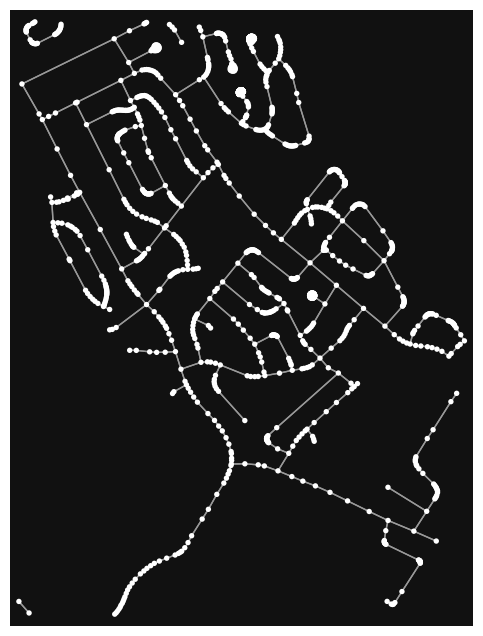

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [78]:
ox.plot_graph(trajBBoxG)

OSMnx graph can be projected to certain CRS and converted into Geodataframes of nodes and edges

In [79]:
trajBBoxPG = ox.projection.project_graph(trajBBoxG)
trajBBoxPN, trajBBoxPE = ox.graph_to_gdfs(trajBBoxPG)
trajBBoxPE.head()

osmid lanes                   name  \
u          v          key                                           
1710478020 3545369713 0    158931169     1  MacDonalds Beach Road   
3545369713 1710478020 0    158931169     1  MacDonalds Beach Road   
1710558862 9027042105 0    158939508     2          Caldwell Road   
9027042105 1710558862 0    158939508     2          Caldwell Road   
           1710558894 0    158939508     2          Caldwell Road   

                               highway maxspeed       access  oneway  length  \
u          v          key                                                      
1710478020 3545369713 0    residential       40  destination   False  59.000   
3545369713 1710478020 0    residential       40  destination   False  59.000   
1710558862 9027042105 0       tertiary      NaN          NaN   False   7.726   
9027042105 1710558862 0       tertiary      NaN          NaN   False   7.726   
           1710558894 0       tertiary      NaN          NaN   False   7.765   

                                                                    geometry  
u          v          key                                                     
1710478020 3545369713 0    LINESTRING (461138.030 4943025.044, 461099.197...  
3545369713 1710478020 0    LINESTRING (461099.197 4943069.500, 461138.030...  
1710558862 9027042105 0    LINESTRING (461467.599 4943018.551, 461473.230...  
9027042105 1710558862 0    LINESTRING (461473.230 4943023.849, 461467.599...  
           1710558894 0    LINESTRING (461473.230 4943023.849, 461478.104...

Code for matching sample GPS points onto network dataset

In [80]:
# Coordinates of points after matching
pointOnNet = []
# The edge IDs of the edges that each of the matched points is on
nearEdgesID = []
# The edge names of the edges that each of the matched points is on
nearEdgesName = []
# Coordinates of the leg(a straight line segment in an edge) that each of the matched points is on
nearLegsGeo = []

# Project the sample GPS points to the same CRS as the network dataset
trajBBoxEPSG = trajBBoxPE.crs.to_epsg()
traj_data_crs = traj_data_crs.to_crs(trajBBoxEPSG)

# Finding the nearest edge for every sample GPS point and take the edges' IDs
for point in traj_data_crs['geometry']:
    coord = (point.x, point.y)
    nearEdge = ox.distance.nearest_edges(trajBBoxPG, point.x, point.y, return_dist=True)
    #print(trajBBoxE.loc[nearEdge[0]]['name'])
    nearEdgesID.append(nearEdge[0])
    #nearEdgesDist.append(nearEdge[1])

# For the each sample GPS point, find the nearest leg on its nearest edges, 
# and find the nearest point on the nearest leg to the sample GPS point
for i in range(len(nearEdgesID)):
    if (i >= 1) and (i < (len(nearEdgesID)-1)):
        # If current GPS point is on a different street from the following and the former GPS points
        # and the following and the former GPS points are on the same street
        # current GPS point could be crossing an interesction of two streets
        if ((trajBBoxE.loc[nearEdgesID[i-1]]['name'] == trajBBoxE.loc[nearEdgesID[i+1]]['name']) 
            and (trajBBoxE.loc[nearEdgesID[i]]['name'] != trajBBoxE.loc[nearEdgesID[i+1]]['name'])):
            nearEdgesID[i] = nearEdgesID[i-1]
    
    # Get the coordinates of the nearest edge of current GPS point 
    nearEdgesName.append(trajBBoxE.loc[nearEdgesID[i]]['name'])
    nearEdgeGeo = trajBBoxPE.loc[nearEdgesID[i]]['geometry']
    nearEdgeCoord = list(nearEdgeGeo.coords)
    
    # find the nearest leg on the nearest edge of current GPS point
    nearLeg = LineString([nearEdgeCoord[0],nearEdgeCoord[1]])
    nearLegDist = nearLeg.distance(traj_data_crs['geometry'][i])
    for i in range(1, len(nearEdgeCoord)-1):
        currLeg = LineString([nearEdgeCoord[i],nearEdgeCoord[i+1]])
        currDist = currLeg.distance(traj_data_crs['geometry'][i])
        if currDist < nearLegDist:
            nearLeg = currLeg
    # find the nearest point on the nearest leg to the sample GPS point
    pointOnNet.append(nearLeg.interpolate(nearLeg.project(point)))
    nearLegsGeo.append(nearLeg)

# Create a dataframe for the points after matching
tempDf = pd.DataFrame({'EPISODEID': list(traj_data_crs['EPISODEID']),
                       'TRACKID': list(traj_data_crs['TRACKID']),
                       'nearEdgeID': nearEdgesID,
                       'nearEdgeName': nearEdgesName,
                       'nearLeg': nearLegsGeo,
                       'geometry': pointOnNet})

# Convert the dataframe into a geodataframe
pointOnNetGdf = gpd.GeoDataFrame(tempDf, geometry='geometry')
pointOnNetGdf.head()


,EPISODEID,TRACKID,nearEdgeID,nearEdgeName,nearLeg,geometry
0,14640_20070403_17,15325184,"(1710560237, 1710560253, 0)",Pearl Drive,LINESTRING (462369.1898216835 4943862.50240155...,POINT (462376.535 4943869.492)
1,14640_20070403_17,15325185,"(1710560237, 1710560253, 0)",Pearl Drive,LINESTRING (462369.1898216835 4943862.50240155...,POINT (462376.535 4943869.492)
2,14640_20070403_17,15325187,"(1710560237, 1710560253, 0)",Pearl Drive,LINESTRING (462369.1898216835 4943862.50240155...,POINT (462376.535 4943869.492)
3,14640_20070403_17,15325188,"(1710560237, 1710560253, 0)",Pearl Drive,LINESTRING (462369.1898216835 4943862.50240155...,POINT (462376.535 4943869.492)
4,14640_20070403_17,15325189,"(1710560237, 1710560253, 0)",Pearl Drive,LINESTRING (462369.1898216835 4943862.50240155...,POINT (462376.535 4943869.492)


Because pointOnNetGdf has not been projected to any CRS yet, we need to first project to the CRS of the network dataset and the global geographic CRS for future visualizing the matched points on GeoJSON

In [81]:
# Project to the CRS of the network dataset
pointOnNetGdf = pointOnNetGdf.set_crs(epsg=trajBBoxEPSG)
pointOnNetGdf.crs.to_epsg()
# Project to the global geographic CRS with EPSG number 4326
pointOnNetGdfGeoCRS=pointOnNetGdf.to_crs(epsg=4326)
pointOnNetGdfGeoCRS.head()

,EPISODEID,TRACKID,nearEdgeID,nearEdgeName,nearLeg,geometry
0,14640_20070403_17,15325184,"(1710560237, 1710560253, 0)",Pearl Drive,LINESTRING (462369.1898216835 4943862.50240155...,POINT (-63.47446 44.64720)
1,14640_20070403_17,15325185,"(1710560237, 1710560253, 0)",Pearl Drive,LINESTRING (462369.1898216835 4943862.50240155...,POINT (-63.47446 44.64720)
2,14640_20070403_17,15325187,"(1710560237, 1710560253, 0)",Pearl Drive,LINESTRING (462369.1898216835 4943862.50240155...,POINT (-63.47446 44.64720)
3,14640_20070403_17,15325188,"(1710560237, 1710560253, 0)",Pearl Drive,LINESTRING (462369.1898216835 4943862.50240155...,POINT (-63.47446 44.64720)
4,14640_20070403_17,15325189,"(1710560237, 1710560253, 0)",Pearl Drive,LINESTRING (462369.1898216835 4943862.50240155...,POINT (-63.47446 44.64720)


In [82]:
print(gjsio.make_url(pointOnNetGdfGeoCRS[['EPISODEID','TRACKID','geometry']].to_json()))

http://geojson.io/#data=data:application/json,%7B%22type%22%3A%20%22FeatureCollection%22%2C%20%22features%22%3A%20%5B%7B%22id%22%3A%20%220%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22EPISODEID%22%3A%20%2214640_20070403_17%22%2C%20%22TRACKID%22%3A%20%2215325184%22%7D%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Point%22%2C%20%22coordinates%22%3A%20%5B-63.474459789699964%2C%2044.647200105012566%5D%7D%7D%2C%20%7B%22id%22%3A%20%221%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22EPISODEID%22%3A%20%2214640_20070403_17%22%2C%20%22TRACKID%22%3A%20%2215325185%22%7D%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Point%22%2C%20%22coordinates%22%3A%20%5B-63.474459789699964%2C%2044.647200105012566%5D%7D%7D%2C%20%7B%22id%22%3A%20%222%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22EPISODEID%22%3A%20%2214640_20070403_17%22%2C%20%22TRACKID%22%3A%20%2215325187%22%7D%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Point%22%2C%20%

Code for detecting gaps on the matched points and filling the gaps with shortest path analysis

In [83]:
# The track IDs of the start points of the gaps
gapsOrigTrackID = []
# The episode IDs of the start points of the gaps
gapsOrigEpsID = []
# The shortest routes that fill the gaps
filledGapsLine = []
# For each pair of adjacent matched points, check if there is a gap between them and fill the gap if found
for i in range(1,len(pointOnNetGdf)):
    # Gap exists when the two adjacent points are not on the same edge in the network dataset 
    # and the distance between them exceeds 50 meters.
    if ((pointOnNetGdf.loc[i-1]['nearEdgeID'] != pointOnNetGdf.loc[i]['nearEdgeID']) 
        and pointOnNetGdf.loc[i-1]['geometry'].distance(pointOnNetGdf.loc[i]['geometry']) > 50):
        #print((pointOnNetGdf.loc[i-1]['TRACKID'], pointOnNetGdf.loc[i]['TRACKID']))
        #print(pointOnNetGdf.loc[i-1]['geometry'].distance(pointOnNetGdf.loc[i]['geometry']))
        # Get the track ID and episode ID of the start point of the gap
        gapsOrigTrackID.append(pointOnNetGdf.loc[i-1]['TRACKID'])
        gapsOrigEpsID.append(pointOnNetGdf.loc[i-1]['EPISODEID'])
        
        # Find the two nodes in the network dataset that are nearest to the start and end points of the gap respectively
        startCoord = (pointOnNetGdf.loc[i-1]['geometry'].x,pointOnNetGdf.loc[i-1]['geometry'].y)
        startNode = ox.distance.nearest_nodes(trajBBoxPG, pointOnNetGdf.loc[i-1]['geometry'].x,pointOnNetGdf.loc[i-1]['geometry'].y)
        endCoord = (pointOnNetGdf.loc[i]['geometry'].x,pointOnNetGdf.loc[i]['geometry'].y)
        endNode = ox.distance.nearest_nodes(trajBBoxPG, pointOnNetGdf.loc[i]['geometry'].x,pointOnNetGdf.loc[i]['geometry'].y)
        # Find the shortest route between the two nodes found
        shortestRoute = ox.distance.shortest_path(trajBBoxPG,
                                                  startNode,
                                                  endNode,
                                                  weight='length')
        #print(shortestRoute)
        # Get the coordinates of the nodes on the shortest route
        shortestRouteGeo = [(trajBBoxPN.loc[nodeID]['geometry'].x, trajBBoxPN.loc[nodeID]['geometry'].y) 
                            for nodeID in shortestRoute]
        #print(shortestRouteGeo)
        # Connect the coordinates of the nodes on the shortest route into one LineString
        filledGapsLine.append(LineString(shortestRouteGeo))
        
        # Check to see if the filled gap went over following points, 
        # if yes, change the overlapped points' coordinates to the end of the filled gap
        # Loops from the current point until the first following point that does not overlap with the filled gap
        for j in range(i, len(pointOnNetGdf)):
            if filledGapsLine[-1].distance(pointOnNetGdf.loc[j]['geometry']) < 1e-8:
                pointOnNetGdf.at[j,'geometry'] = Point(shortestRouteGeo[-1])
            else:
                break

# Create a dataframe for the filled gaps 
tempDf = pd.DataFrame({'EPISODEID': gapsOrigEpsID,
                       'OrigPointTRACKID': gapsOrigTrackID,
                       'geometry': filledGapsLine})
# Convert the dataframe into a geodataframe
filledGapsGdf = gpd.GeoDataFrame(tempDf, geometry='geometry')

In [84]:
# Project the pointOnNetGdf to CRS EPSG 4326 again 
# in case the geometry of any point in pointOnNetGdf has been changed when filling the gaps
pointOnNetGdfGeoCRS=pointOnNetGdf.to_crs(epsg=4326)
#print(gjsio.make_url(pointOnNetGdfGeoCRS[['EPISODEID','TRACKID','geometry']].to_json()))

In [85]:
filledGapsGdf.head()

,EPISODEID,OrigPointTRACKID,geometry
0,14640_20070403_17,15325215,"LINESTRING (462369.190 4943862.502, 462384.540..."
1,14640_20070403_17,15325221,"LINESTRING (462339.900 4944061.803, 462348.326..."
2,14640_20070403_17,15325226,"LINESTRING (462395.398 4944141.805, 462431.547..."
3,14640_20070403_17,15325230,"LINESTRING (462431.547 4944185.095, 462327.777..."
4,14640_20070403_17,15325234,"LINESTRING (462327.777 4944274.400, 462226.943..."


Project the geodataframe to the CRS of the network dataset and the global geographic CRS 

In [86]:
filledGapsGdf = filledGapsGdf.set_crs(epsg=trajBBoxEPSG)
filledGapsGdfGeoCRS=filledGapsGdf.to_crs(epsg=4326)

In [87]:
filledGapsGdfGeoCRS.head()

,EPISODEID,OrigPointTRACKID,geometry
0,14640_20070403_17,15325215,"LINESTRING (-63.47455 44.64714, -63.47436 44.6..."
1,14640_20070403_17,15325221,"LINESTRING (-63.47494 44.64893, -63.47483 44.6..."
2,14640_20070403_17,15325226,"LINESTRING (-63.47424 44.64965, -63.47379 44.6..."
3,14640_20070403_17,15325230,"LINESTRING (-63.47379 44.65004, -63.47510 44.6..."
4,14640_20070403_17,15325234,"LINESTRING (-63.47510 44.65084, -63.47638 44.6..."


In [88]:
print(gjsio.make_url(filledGapsGdfGeoCRS.to_json()))

http://geojson.io/#data=data:application/json,%7B%22type%22%3A%20%22FeatureCollection%22%2C%20%22features%22%3A%20%5B%7B%22id%22%3A%20%220%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22EPISODEID%22%3A%20%2214640_20070403_17%22%2C%20%22OrigPointTRACKID%22%3A%20%2215325215%22%7D%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22LineString%22%2C%20%22coordinates%22%3A%20%5B%5B-63.47455190000001%2C%2044.647136799999984%5D%2C%20%5B-63.4743594%2C%2044.64726909999999%5D%2C%20%5B-63.4742407%2C%2044.6473433%5D%2C%20%5B-63.47439500000001%2C%2044.64746119999999%5D%2C%20%5B-63.47500900000001%2C%2044.6478135%5D%2C%20%5B-63.4754972%2C%2044.647994499999996%5D%2C%20%5B-63.47590099999999%2C%2044.648327699999996%5D%2C%20%5B-63.475356299999994%2C%2044.6486729%5D%5D%7D%7D%2C%20%7B%22id%22%3A%20%221%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22EPISODEID%22%3A%20%2214640_20070403_17%22%2C%20%22OrigPointTRACKID%22%3A%20%2215325221%22%7D%2C%20%22geometry%22%3A%2

Code for connecting the matched points and filled gaps altogether to generate a route for the sample GPS data

In [89]:
# Coordinates of the points on the route
routePoints = []
for i in range(len(pointOnNetGdfGeoCRS)):
    # Check if the 'EPISODEID','TRACKID' combination of the current row exists in the Geodataframe for filled gaps
    if np.any(np.all(pointOnNetGdfGeoCRS.loc[i][['EPISODEID','TRACKID']].values 
                     == filledGapsGdfGeoCRS[['EPISODEID','OrigPointTRACKID']].values, axis=1)):
        # Find the row of Geodataframe for filled gaps, and get the coordinates of the LineString on the row
        gapRow = filledGapsGdfGeoCRS[(filledGapsGdfGeoCRS['EPISODEID'] == pointOnNetGdfGeoCRS.loc[i]['EPISODEID']) 
                                      & (filledGapsGdfGeoCRS['OrigPointTRACKID'] == pointOnNetGdfGeoCRS.loc[i]['TRACKID'])]
        # Add coordinates for the filled gap into routePoints
        for coord in list(gapRow['geometry'].values[0].coords):
            # Make sure there is no consecutive duplicate points in the line
            #print(coord)
            if (len(routePoints) > 0 and coord == routePoints[-1]):
                #print(routePoints[-1])
                continue
            routePoints.append(coord)    
            
    else:
        # if the point of the current row does not overlap on the last point in routePoints add its coordinates into routePoints
        if (len(routePoints) > 0 
            and (pointOnNetGdfGeoCRS.loc[i]['geometry'].x,pointOnNetGdfGeoCRS.loc[i]['geometry'].y) != routePoints[-1]):
            routePoints.append((pointOnNetGdfGeoCRS.loc[i]['geometry'].x,pointOnNetGdfGeoCRS.loc[i]['geometry'].y))
        # if the point of the current row overlaps with the last point, ignore it
        else:
            continue

# Generate a single LineString for the route
routeLine = LineString(routePoints)
tempDf = pd.DataFrame({'EPISODEID': [pointOnNetGdfGeoCRS.loc[i]['EPISODEID']],
                       'geometry': routeLine})
routesGdf = gpd.GeoDataFrame(tempDf, geometry='geometry')

In [90]:
print(gjsio.make_url(routesGdf.to_json()))

http://geojson.io/#data=data:application/json,%7B%22type%22%3A%20%22FeatureCollection%22%2C%20%22features%22%3A%20%5B%7B%22id%22%3A%20%220%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22EPISODEID%22%3A%20%2214640_20070403_17%22%7D%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22LineString%22%2C%20%22coordinates%22%3A%20%5B%5B-63.47455190000001%2C%2044.647136799999984%5D%2C%20%5B-63.4743594%2C%2044.64726909999999%5D%2C%20%5B-63.4742407%2C%2044.6473433%5D%2C%20%5B-63.47439500000001%2C%2044.64746119999999%5D%2C%20%5B-63.47500900000001%2C%2044.6478135%5D%2C%20%5B-63.4754972%2C%2044.647994499999996%5D%2C%20%5B-63.47590099999999%2C%2044.648327699999996%5D%2C%20%5B-63.475356299999994%2C%2044.6486729%5D%2C%20%5B-63.4749359%2C%2044.6489294%5D%2C%20%5B-63.4748303%2C%2044.6490106%5D%2C%20%5B-63.4747459%2C%2044.649085199999995%5D%2C%20%5B-63.474684%2C%2044.6491677%5D%2C%20%5B-63.47462709999999%2C%2044.6492602%5D%2C%20%5B-63.4745886%2C%2044.6493314%5D%2C%20%5B-63.4745374%2C%2

Create sample stop segment GPS data with the fist 11 rows of the traj_data_crs

In [91]:
sample_stop_seg_proj = traj_data_crs.loc[:11]
sample_stop_seg_proj.loc[:]['ACTCODE'] = 'stop'
sample_stop_seg_proj.loc[:]['DESTCODE'] = 'stop'
sample_stop_seg_proj

,EPISODEID,TRACKID,DURSEC,TIMESTART,ACTCODE,DESTCODE,geometry
0,14640_20070403_17,15325184,11,12:34:13,stop,stop,POINT (462385.143 4943852.226)
1,14640_20070403_17,15325185,2,12:34:15,stop,stop,POINT (462383.933 4943852.234)
2,14640_20070403_17,15325187,5,12:34:20,stop,stop,POINT (462383.923 4943850.538)
3,14640_20070403_17,15325188,3,12:34:23,stop,stop,POINT (462386.924 4943846.283)
4,14640_20070403_17,15325189,2,12:34:25,stop,stop,POINT (462387.524 4943845.433)
5,14640_20070403_17,15325192,8,12:34:33,stop,stop,POINT (462388.122 4943844.158)
6,14640_20070403_17,15325193,2,12:34:35,stop,stop,POINT (462385.714 4943846.290)
7,14640_20070403_17,15325194,3,12:34:38,stop,stop,POINT (462383.609 4943848.422)
8,14640_20070403_17,15325195,2,12:34:40,stop,stop,POINT (462382.718 4943851.393)
9,14640_20070403_17,15325196,3,12:34:43,stop,stop,POINT (462380.323 4943855.645)


Other than reading from given OSM PBF file, we could also use OSMnx to get landuse and buildings data from given max/min values of longitudes and latitudes with geometries_from_bbox method

In [92]:
trajBBoxLU= ox.geometries.geometries_from_bbox(maxY, minY, maxX, minX, tags ={ 'landuse':True})
trajBBoxLU

C:\Users\jimta\anaconda3\envs\PyERT_environment\lib\site-packages\geopandas\_vectorized.py:150: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  out[:] = [_pygeos_to_shapely(geom) for geom in data]
C:\Users\jimta\anaconda3\envs\PyERT_environment\lib\site-packages\geopandas\_vectorized.py:150: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  out[:] = [_pygeos_to_shapely(geom) for geom in data]
C:\Users\jimta\anaconda3\envs\PyERT_environment\lib\site-packages

addr:city addr:housenumber    addr:street  \
element_type osmid                                                        
way          158931336  Eastern Passage              915  Caldwell Road   
             436911918     Cole Harbour               25  Parkway Drive   
             489339133     Cole Harbour                8   Astral Drive   
             489339135     Cole Harbour              365  Caldwell Road   
relation     6378574                NaN              NaN            NaN   
             9381846                NaN              NaN            NaN   
             13745200               NaN              NaN            NaN   
             13745217               NaN              NaN            NaN   
             13836111      Cole Harbour              126   Astral Drive   

                                    source  \
element_type osmid                           
way          158931336    NRCan-CanVec-8.0   
             436911918                 NaN   
             489339133                 NaN   
             489339135                 NaN   
relation     6378574    CanVec 6.0 - NRCan   
             9381846                  Bing   
             13745200                  NaN   
             13745217                  NaN   
             13836111                  NaN   

                                                                 geometry  \
element_type osmid                                                          
way          158931336  POLYGON ((-63.48760 44.63893, -63.48806 44.639...   
             436911918  POLYGON ((-63.46900 44.64561, -63.46965 44.645...   
             489339133  POLYGON ((-63.48953 44.65696, -63.48929 44.656...   
             489339135  POLYGON ((-63.49084 44.65828, -63.49050 44.657...   
relation     6378574    MULTIPOLYGON (((-63.54772 44.68426, -63.54785 ...   
             9381846    POLYGON ((-63.52306 44.62860, -63.52166 44.627...   
             13745200   POLYGON ((-63.48023 44.64423, -63.48013 44.644...   
             13745217   POLYGON ((-63.47267 44.64886, -63.47102 44.650...   
             13836111   POLYGON ((-63.48249 44.65902, -63.48235 44.658...   

                       addr:province            name  \
element_type osmid                                     
way          158931336   Nova Scotia             NaN   
             436911918   Nova Scotia             NaN   
             489339133   Nova Scotia             NaN   
             489339135   Nova Scotia             NaN   
relation     6378574             NaN             NaN   
             9381846             NaN  CFB Shearwater   
             13745200            NaN             NaN   
             13745217            NaN             NaN   
             13836111    Nova Scotia             NaN   

                                                                    nodes  \
element_type osmid                                                          
way          158931336  [1710477990, 1710478007, 1710478011, 171047804...   
             436911918  [1710586218, 1710586212, 1710586205, 485279468...   
             489339133  [4815844677, 4815844678, 4815844679, 481584468...   
             489339135  [4915308877, 4915308878, 4815844683, 481584468...   
relation     6378574    [[[4842118682, 4915039959, 4915039987, 4915039...   
             9381846    [[[4631100347, 4631100346, 4631100338, 4631100...   
             13745200   [[[1710586002, 5807934072, 5807934073, 4856688...   
             13745217   [[[9464583533, 4911425702, 4911425701, 4911425...   
             13836111   [[[4835802283, 1720763261, 4856617998, 4856617...   

                                wikipedia      landuse addr:postcode  \
element_type osmid                                                     
way          158931336                NaN       quarry           NaN   
             436911918                NaN       quarry       B2V 1E1   
             489339133                NaN       retail       B2V 1B2   
             489339135  

In [93]:
trajBBoxLU.dtypes

addr:city             object
addr:housenumber      object
addr:street           object
source                object
geometry            geometry
addr:province         object
name                  object
nodes                 object
wikipedia             object
landuse               object
addr:postcode         object
addr:district         object
type                  object
ways                  object
aeroway               object
icao                  object
level                 object
military              object
dtype: object

In [94]:
trajBBoxPAL= ox.geometries.geometries_from_bbox(maxY, minY, maxX, minX, tags ={ 'building':True})
trajBBoxPAL.head()

C:\Users\jimta\anaconda3\envs\PyERT_environment\lib\site-packages\geopandas\_vectorized.py:106: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  arr[:] = data
C:\Users\jimta\anaconda3\envs\PyERT_environment\lib\site-packages\geopandas\_vectorized.py:106: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  arr[:] = data
C:\Users\jimta\anaconda3\envs\PyERT_environment\lib\site-packages\geopandas\_vectorized.py:106: DeprecationWarning: An exception was ignored wh

nodes  \
element_type osmid                                                          
way          158939597  [1710561403, 4915039953, 4915039954, 171056141...   
             158939600  [1710561433, 1710561441, 1710561465, 171056144...   
             163156754  [1749170120, 1749170118, 4827918473, 485447728...   
             215306576  [2247102080, 2247102088, 2247102114, 224710210...   
             215306577  [2247102090, 2247102086, 2247102070, 224710206...   

                              addr:city addr:housenumber addr:postcode  \
element_type osmid                                                       
way          158939597     Cole Harbour              238       B2V 1B8   
             158939600     Cole Harbour              236       B2V 1B8   
             163156754  Cole Harbour 30               31       B2V 0A2   
             215306576     Cole Harbour               34       B2V 2V1   
             215306577     Cole Harbour               38       B2V 2V1   

                       addr:province        addr:street building  \
element_type osmid                                                 
way          158939597   Nova Scotia       Astral Drive   school   
             158939600   Nova Scotia       Astral Drive   school   
             163156754   Nova Scotia   Millbrook Avenue   office   
             215306576   Nova Scotia  Parkedge Crescent      yes   
             215306577   Nova Scotia  Parkedge Crescent      yes   

                       building:levels                             name  \
element_type osmid                                                        
way          158939597               2  Astral Drive Junior High School   
             158939600               2   Astral Drive Elementary School   
             163156754             NaN                        GD Canada   
             215306576             NaN                              NaN   
             215306577             NaN                              NaN   

                       roof:levels  ... addr:suburb roof:shape communication  \
element_type osmid                  ...                                        
way          158939597           0  ...         NaN        NaN           NaN   
             158939600           0  ...         NaN        NaN           NaN   
             163156754         NaN  ...         NaN        NaN           NaN   
             215306576         NaN  ...         NaN        NaN           NaN   
             215306577         NaN  ...         NaN        NaN           NaN   

                       operator operator:wikidata telecom office  \
element_type osmid                                                 
way          158939597      NaN               NaN     NaN    NaN   
             158939600      NaN               NaN     NaN    NaN   
             163156754      NaN               NaN     NaN    NaN   
             215306576      NaN               NaN     NaN    NaN   
             215306577      NaN               NaN     NaN    NaN   

                       opening_hours:signed website man_made  
element_type osmid                                            
way          158939597                  NaN     NaN      NaN  
             158939600                  NaN     NaN      NaN  
             163156754                  NaN     NaN      NaN  
             215306576                  NaN     NaN      NaN  
             215306577                  NaN     NaN      NaN  

[5 rows x 24 columns]

Project the landuse and buildings data to projected CRS

In [95]:
trajBBoxPALProj = trajBBoxPAL.to_crs(trajBBoxEPSG)
trajBBoxLUProj = trajBBoxLU.to_crs(trajBBoxEPSG)

Function for identifying the landuse information of the stop segment

In [96]:
def identify_LU(AL_gdf, LU_gdf):
    # Initialize the lists that are needed for new columns that includes the info about landuse area classification 
    # and the index of landuse area in the LU_gdf 
    LU_class_list = []
    LU_index_list = []
    # Loop through the AL_gdf row by row
    for i in range(len(AL_gdf)):
        # Get the geometry of the stop point on current row
        AL_geo = AL_gdf.loc[i]['geometry']
        # Initialize the variables for the closest landuse area with the first row of LU_gdf
        closest_LU_class = LU_gdf.iloc[0]['landuse']
        closest_LU_geo = LU_gdf.iloc[0]['geometry']
        closest_LU_index = list(LU_gdf.index)[0]
        closest_dist = closest_LU_geo.distance(AL_geo)
        # If the distance is 0 (1e-8 for some tolerance), meaning the stop point is inside the landuse area on the first row
        if closest_dist < 1e-8:
            LU_class_list.append(closest_LU_class)
            LU_index_list.append(closest_LU_index)
            continue
        
        # Loop through the LU_gdf row by row from the second row
        for j in range(1,len(LU_gdf)):
            curr_LU_class = LU_gdf.iloc[j]['landuse']
            curr_LU_geo = LU_gdf.iloc[j]['geometry']
            curr_LU_index = list(LU_gdf.index)[j]
            curr_dist = curr_LU_geo.distance(AL_geo)
            # If the distance from the stop point to the current landuse area is smaller than the recorded closest distance
            # update the closest_dist, closest_LU_class, closest_LU_geo and closest_LU_index variables 
            # to the values of the current landuse area
            if curr_dist < closest_dist:
                closest_dist = curr_dist
                closest_LU_class = curr_LU_class
                closest_LU_geo = curr_LU_geo
                closest_LU_index = curr_LU_index
                # If the stop point is found to be inside the current landuse area (i.e. diatance = 0), break
                if closest_dist < 1e-8:
                    break
        # Add the closest landuse area classfication and index found for current stop point inside the lists
        LU_class_list.append(closest_LU_class)
        LU_index_list.append(closest_LU_index)
        #print(closest_LU_class)
        #print(closest_LU_index)
    
    # Create a copy of AL_gdf and add new lu_classification and lu_index columns with the corresponding lists
    AL_LU_gdf = AL_gdf.copy()
    AL_LU_gdf['lu_classification'] = LU_class_list
    AL_LU_gdf['lu_index'] = LU_index_list
    return AL_LU_gdf

In [97]:
sample_AL_LU_gdf = identify_LU(sample_stop_seg_proj, trajBBoxLUProj)

Function for identifying the buildings information of the stop segment, ideas are the same as the function for identifying the landuse information

In [98]:
def identify_PAL(AL_gdf, PAL_gdf):
    # Initialize the lists that are needed for new columns that includes the info about the buildings in the LU_gdf 
    PAL_house_num_list = []
    PAL_street_name_list = []
    PAL_city_list = []
    PAL_province_list = []
    PAL_name_list = []
    PAL_geo_list = []
    PAL_index_list = []
    # Loop through the AL_gdf row by row
    for i in range(len(AL_gdf)):
        # Get the geometry of the stop point on current row
        AL_geo = AL_gdf.loc[i]['geometry']
        # Initialize the variables for the closest building with the first row of PAL_gdf
        closest_PAL_house_num = PAL_gdf.iloc[0]['addr:housenumber']
        closest_PAL_street_name = PAL_gdf.iloc[0]['addr:street']
        closest_PAL_city = PAL_gdf.iloc[0]['addr:city']
        closest_PAL_province = PAL_gdf.iloc[0]['addr:province']
        closest_PAL_name = PAL_gdf.iloc[0]['name']
        closest_PAL_geo = PAL_gdf.iloc[0]['geometry']
        closest_PAL_index = list(PAL_gdf.index)[0]
        closest_dist = closest_PAL_geo.distance(AL_geo)
        # If the distance is 0 (1e-8 for some tolerance), meaning the stop point is inside the building on the first row
        if closest_dist < 1e-8:
            PAL_house_num_list.append(closest_PAL_house_num)
            PAL_street_name_list.append(closest_PAL_street_name)
            PAL_city_list.append(closest_PAL_city)
            PAL_province_list.append(closest_PAL_province)
            PAL_name_list.append(closest_PAL_name)
            PAL_geo_list.append(closest_PAL_geo)
            PAL_index_list.append(closest_PAL_index)
            continue
        
        # Loop through the PAL_gdf row by row from the second row
        for j in range(1,len(PAL_gdf)):
            curr_PAL_geo = PAL_gdf.iloc[j]['geometry']
            curr_dist = curr_PAL_geo.distance(AL_geo)
            # If the distance from the stop point to the current building is smaller than the recorded closest distance
            # update the variables to the values of the current building
            if curr_dist < closest_dist:
                closest_dist = curr_dist
                closest_PAL_house_num = PAL_gdf.iloc[j]['addr:housenumber']
                closest_PAL_street_name = PAL_gdf.iloc[j]['addr:street']
                closest_PAL_city = PAL_gdf.iloc[j]['addr:city']
                closest_PAL_province = PAL_gdf.iloc[j]['addr:province']
                closest_PAL_name = PAL_gdf.iloc[j]['name']
                closest_PAL_geo = curr_PAL_geo
                closest_PAL_index = list(PAL_gdf.index)[j]
                # If the stop point is found to be inside the current building (i.e. diatance = 0), break
                if closest_dist < 1e-8:
                    break
        # Add the properties of the closest building found for current stop point inside the lists
        PAL_house_num_list.append(closest_PAL_house_num)
        PAL_street_name_list.append(closest_PAL_street_name)
        PAL_city_list.append(closest_PAL_city)
        PAL_province_list.append(closest_PAL_province)
        PAL_name_list.append(closest_PAL_name)
        PAL_geo_list.append(closest_PAL_geo)
        PAL_index_list.append(closest_PAL_index)
        #print(closest_dist)
        #print(closest_PAL_house_num)
        #print(closest_PAL_street_name)
        #print(closest_PAL_city)
        #print(closest_PAL_province)
        #print(closest_PAL_name)
        #print(closest_PAL_index)
        #print()
    # Create a copy of AL_gdf and add new columns with the corresponding lists
    AL_PAL_gdf = AL_gdf.copy()
    AL_PAL_gdf['house_number'] = PAL_house_num_list
    AL_PAL_gdf['street_name'] = PAL_street_name_list
    AL_PAL_gdf['city'] = PAL_city_list
    AL_PAL_gdf['province'] = PAL_province_list
    AL_PAL_gdf['name_of_building'] = PAL_name_list
    AL_PAL_gdf['building_geometry'] = PAL_geo_list
    AL_PAL_gdf['building_index'] = PAL_index_list
    return AL_PAL_gdf

In [102]:
sample_AL_PAL_gdf = identify_PAL(sample_stop_seg_proj, trajBBoxPALProj)

C:\Users\jimta\anaconda3\envs\PyERT_environment\lib\site-packages\pandas\core\dtypes\cast.py:1990: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  result[:] = values


Function for creating a geodataframe that contains the landuse and building information for stop segments

In [100]:
def create_AL_info(AL_LU_gdf,AL_PAL_gdf):
    # Joining the geodataframes that contain the landuse info and building info that was identified for the stop segments 
    joined_gdf = AL_PAL_gdf.copy()
    joined_gdf['lu_classification'] = AL_LU_gdf['lu_classification']
    joined_gdf['lu_index'] = AL_LU_gdf['lu_index']
    #joined_gdf = AL_PAL_gdf.merge(AL_LU_gdf,how='inner')
    return joined_gdf

In [103]:
create_AL_info(sample_AL_LU_gdf,sample_AL_PAL_gdf)

,EPISODEID,TRACKID,DURSEC,TIMESTART,ACTCODE,DESTCODE,geometry,house_number,street_name,city,province,name_of_building,building_geometry,building_index,lu_classification,lu_index
0,14640_20070403_17,15325184,11,12:34:13,stop,stop,POINT (462385.143 4943852.226),79,Pearl Drive,Cole Harbour,Nova Scotia,NaN,"POLYGON ((462392.5971959707 4943863.510367594,...","(way, 492585924)",residential,"(relation, 13745200)"
1,14640_20070403_17,15325185,2,12:34:15,stop,stop,POINT (462383.933 4943852.234),79,Pearl Drive,Cole Harbour,Nova Scotia,NaN,"POLYGON ((462392.5971959707 4943863.510367594,...","(way, 492585924)",residential,"(relation, 13745200)"
2,14640_20070403_17,15325187,5,12:34:20,stop,stop,POINT (462383.923 4943850.538),79,Pearl Drive,Cole Harbour,Nova Scotia,NaN,"POLYGON ((462392.5971959707 4943863.510367594,...","(way, 492585924)",residential,"(relation, 13745200)"
3,14640_20070403_17,15325188,3,12:34:23,stop,stop,POINT (462386.924 4943846.283),79,Pearl Drive,Cole Harbour,Nova Scotia,NaN,"POLYGON ((462392.5971959707 4943863.510367594,...","(way, 492585924)",residential,"(relation, 13745200)"
4,14640_20070403_17,15325189,2,12:34:25,stop,stop,POINT (462387.524 4943845.433),79,Pearl Drive,Cole Harbour,Nova Scotia,NaN,"POLYGON ((462392.5971959707 4943863.510367594,...","(way, 492585924)",residential,"(relation, 13745200)"
5,14640_20070403_17,15325192,8,12:34:33,stop,stop,POINT (462388.122 4943844.158),79,Pearl Drive,Cole Harbour,Nova Scotia,NaN,"POLYGON ((462392.5971959707 4943863.510367594,...","(way, 492585924)",residential,"(relation, 13745200)"
6,14640_20070403_17,15325193,2,12:34:35,stop,stop,POINT (462385.714 4943846.290),79,Pearl Drive,Cole Harbour,Nova Scotia,NaN,"POLYGON ((462392.5971959707 4943863.510367594,...","(way, 492585924)",residential,"(relation, 13745200)"
7,14640_20070403_17,15325194,3,12:34:38,stop,stop,POINT (462383.609 4943848.422),79,Pearl Drive,Cole Harbour,Nova Scotia,NaN,"POLYGON ((462392.5971959707 4943863.510367594,...","(way, 492585924)",residential,"(relation, 13745200)"
8,14640_20070403_17,15325195,2,12:34:40,stop,stop,POINT (462382.718 4943851.393),79,Pearl Drive,Cole Harbour,Nova Scotia,NaN,"POLYGON ((462392.5971959707 4943863.510367594,...","(way, 492585924)",residential,"(relation, 13745200)"
9,14640_20070403_17,15325196,3,12:34:43,stop,stop,POINT (462380.323 4943855.645),79,Pearl Drive,Cole Harbour,Nova Scotia,NaN,"POLYGON ((462392.5971959707 4943863.510367594,...","(way, 492585924)",residential,"(relation, 13745200)"
